<a href="https://colab.research.google.com/github/alindote/MES/blob/desafios/MES_desafio4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# define parameters, create lattice
temperature = 0.1
J = 1
steps = 10**6
xsize = ysize = 100 # spins in each direction
# create initial lattice with random spins
initial_lattice = np.random.choice([-1, 1], size=(xsize, ysize))

total_magnetisation = np.sum(initial_lattice)
print('Initial magnetisation:', total_magnetisation)


Initial magnetisation: 6


In [ ]:
lattice = initial_lattice.copy()

# Do the Metropolis cycle
for step in range(steps):
  # ramdomly select one position of the lattice
  # note that we avoid spins at the borders
  x, y = np.random.randint(1, xsize-1), np.random.randint(1, ysize-1)
  current_spin = lattice[x, y]
  #print('Initial spin state:', current_spin)
  proposed_spin = -current_spin

  # calculate the energy difference
  neighbors = lattice[(x-1), y] + lattice[(x+1), y] + lattice[x, (y-1)] + lattice[x, (y+1)]
  energy_diff = -J * neighbors * (proposed_spin - current_spin)
  #print('Energy difference:', energy_diff)

  # apply the Metropolis criterion
  if energy_diff < 0:
    # accept the move
    lattice[x, y] = proposed_spin
    #print('Move accepted')
  elif np.random.rand() < np.exp(-energy_diff / temperature):   # note that we use k=1 for simplicity
    # accept the move
    lattice[x, y] = proposed_spin
    #print('Move accepted')
  #else:
    # reject the move
    #print('Move rejected')

Temperature: 0.1
Final magnetisation: 200


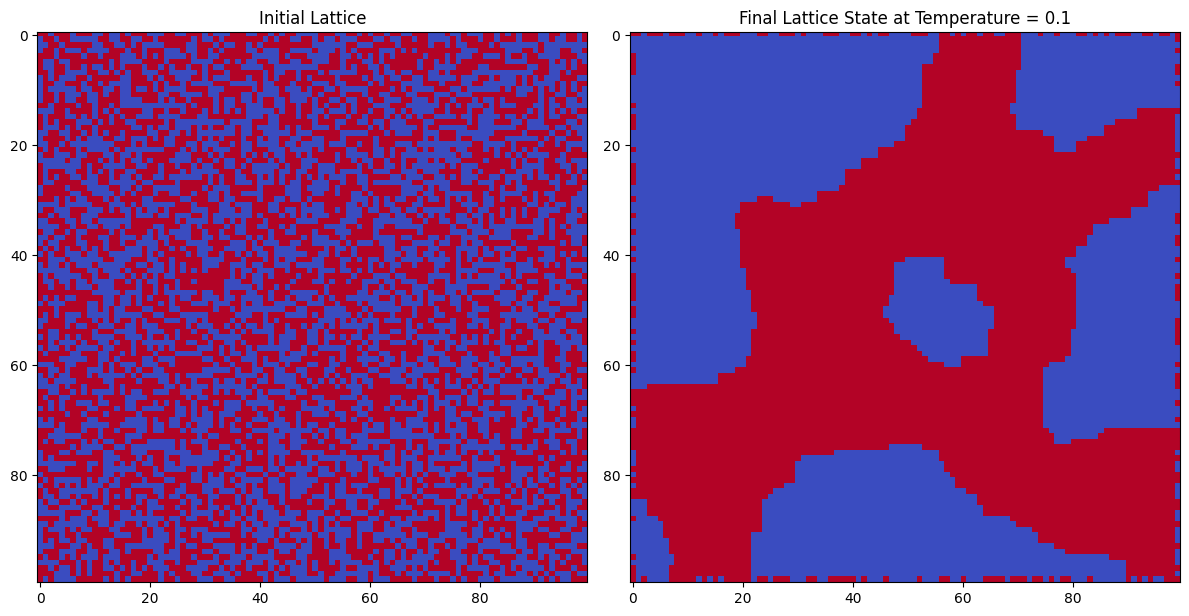

In [ ]:
# total magnetisation of the lattice
total_magnetisation = np.sum(lattice)
print('Temperature:',temperature)
print('Final magnetisation:', total_magnetisation)

# plot the initial and final lattices side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(initial_lattice, cmap='coolwarm', interpolation='nearest')
axes[0].set_title('Initial Lattice')

axes[1].imshow(lattice, cmap='coolwarm', interpolation='nearest')
axes[1].set_title(f'Final Lattice State at Temperature = {temperature}')

plt.tight_layout()
plt.show()